# Ocean stats

In [1]:
from mom6_tools.DiagsCase import DiagsCase
import yaml,os
import pandas as pd
import glob
import xarray
import cftime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

In [2]:
# Read in the yaml file
diag_config_yml_path = "/glade/u/home/gmarques/libs/mom6-tools/docs/source/examples/diag_config.yml"
diag_config_yml = yaml.load(open(diag_config_yml_path,'r'), Loader=yaml.Loader)

In [3]:
# Create the case instance
dcase = DiagsCase(diag_config_yml['Case'])
print('Casename is:', dcase.casename)
RUNDIR = dcase.get_value('RUNDIR')
all_files = glob.glob(os.path.join(RUNDIR, "ocean.stats"))

Casename is: g.c2b6.GJRA.TL319_t061.long_JRA_mct.076


In [4]:
colnames = ['Step','Day','Truncs','Energy/Mass','Maximum CFL', 'Mean Sea Level', 'Total Mass', 'Mean Salin', 'Mean Temp', 'Frac Mass Err', 'Salin Err', 'Temp Err']
units = ['nondim','days','nondim','m2 s-2','nondim', 'm', 'kg', 'PSU', 'degC', 'nondim', 'PSU', 'degC']

In [5]:
df = pd.read_csv(all_files[0], header=1, error_bad_lines=False, sep=',',  names = colnames) 

In [6]:
df.head(10)

,Step,Day,Truncs,Energy/Mass,Maximum CFL,Mean Sea Level,Total Mass,Mean Salin,Mean Temp,Frac Mass Err,Salin Err,Temp Err
0,0,0.0,0,En 2.4571649248052563E-23,CFL 0.00000,SL -1.3599E-10,M 1.38614E+21,S 34.7202,T 3.5781,Me 0.00E+00,Se 0.00E+00,Te 0.00E+00
1,23,1.0,0,En 9.8082713560573701E-04,CFL 0.05888,SL -1.3812E-10,M 1.38614E+21,S 34.7202,T 3.5780,Me 1.78E-19,Se 1.66E-16,Te -1.62E-18
2,47,2.0,0,En 1.0477053248426859E-03,CFL 0.05146,SL -1.3812E-10,M 1.38614E+21,S 34.7202,T 3.5780,Me 1.73E-20,Se -1.73E-17,Te -6.76E-18
3,71,3.0,0,En 1.1103548714490880E-03,CFL 0.05868,SL -1.3883E-10,M 1.38614E+21,S 34.7202,T 3.5779,Me -1.34E-19,Se -1.62E-17,Te 3.13E-18
4,95,4.0,0,En 1.0897107455835520E-03,CFL 0.06285,SL -1.3599E-10,M 1.38614E+21,S 34.7202,T 3.5779,Me -4.33E-19,Se -7.36E-18,Te -2.23E-18
5,119,5.0,0,En 1.0783292792344746E-03,CFL 0.07048,SL -1.3812E-10,M 1.38614E+21,S 34.7202,T 3.5778,Me 3.42E-19,Se 5.70E-17,Te 3.63E-18
6,143,6.0,0,En 1.0541041612146653E-03,CFL 0.06984,SL -1.3670E-10,M 1.38614E+21,S 34.7202,T 3.5778,Me 1.21E-19,Se -1.85E-17,Te -9.41E-19
7,167,7.0,0,En 1.0405843511657768E-03,CFL 0.09139,SL -1.3670E-10,M 1.38614E+21,S 34.7202,T 3.5779,Me 2.71E-19,Se 1.30E-17,Te 5.78E-19
8,191,8.0,0,En 1.0315200927403297E-03,CFL 0.07750,SL -1.3812E-10,M 1.38614E+21,S 34.7202,T 3.5779,Me 4.49E-19,Se -2.64E-17,Te 1.02E-18
9,215,9.0,0,En 1.0428894544672127E-03,CFL 0.08749,SL -1.4097E-10,M 1.38614E+21,S 34.7202,T 3.5780,Me -2.09E-19,Se 2.38E-17,Te 1.99E-18


In [7]:
# transfor to xarray and change/rename the coords
xr = df.to_xarray()
del xr['index'], xr['Step']
xr = xr.rename({'index': 'Day'})
xr.set_coords('Day')

<xarray.Dataset>
Dimensions:         (Day: 21176)
Coordinates:
  * Day             (Day) float64 0.0 1.0 2.0 ... 2.117e+04 2.117e+04 2.117e+04
Data variables:
    Truncs          (Day) int64 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
    Energy/Mass     (Day) object ' En 2.4571649248052563E-23' ... ' En 1.0158479597159721E-03'
    Maximum CFL     (Day) object ' CFL  0.00000' ... ' CFL  0.08558'
    Mean Sea Level  (Day) object ' SL -1.3599E-10' ... ' SL -1.3243E-10'
    Total Mass      (Day) object ' M 1.38614E+21' ... ' M 1.38614E+21'
    Mean Salin      (Day) object ' S 34.7202' ' S 34.7202' ... ' S 34.7203'
    Mean Temp       (Day) object ' T  3.5781' ' T  3.5780' ... ' T  3.6890'
    Frac Mass Err   (Day) object ' Me  0.00E+00' ... ' Me  8.69E-20'
    Salin Err       (Day) object ' Se  0.00E+00' ... ' Se -4.23E-17'
    Temp Err        (Day) object ' Te  0.00E+00' ... ' Te -7.12E-21'

In [8]:
# add attrs units
k = 1
for var in xr.variables:
    print(var,k, units[k])
    xr[var].attrs['units'] = units[k]
    k = k + 1

Day 1 days
Truncs 2 nondim
Energy/Mass 3 m2 s-2
Maximum CFL 4 nondim
Mean Sea Level 5 m
Total Mass 6 kg
Mean Salin 7 PSU
Mean Temp 8 degC
Frac Mass Err 9 nondim
Salin Err 10 PSU
Temp Err 11 degC


### Some columns have strings in them (e.g., CFL and En) and we need to remove them.

In [9]:
colnames = ['Energy/Mass','Maximum CFL', 'Mean Sea Level', 'Total Mass', 'Mean Salin', 'Mean Temp', 'Frac Mass Err', 'Salin Err', 'Temp Err']

for var in colnames:
  print(var)
  nt = len(xr[var])
  dummy = np.zeros(nt)
  for t in range(nt):
    dummy[t] = float(str(xr[var][t].values).strip().split()[1])
    
  xr[var].values[:] = dummy[:]

Energy/Mass
Maximum CFL
Mean Sea Level
Total Mass
Mean Salin
Mean Temp
Frac Mass Err
Salin Err
Temp Err


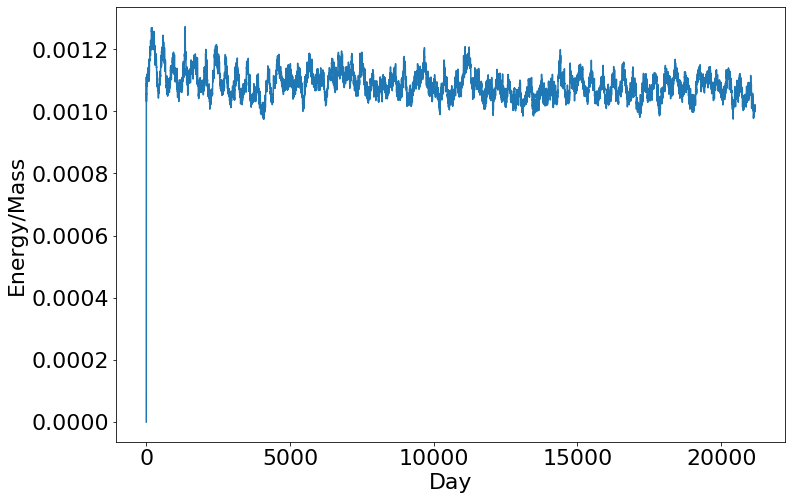

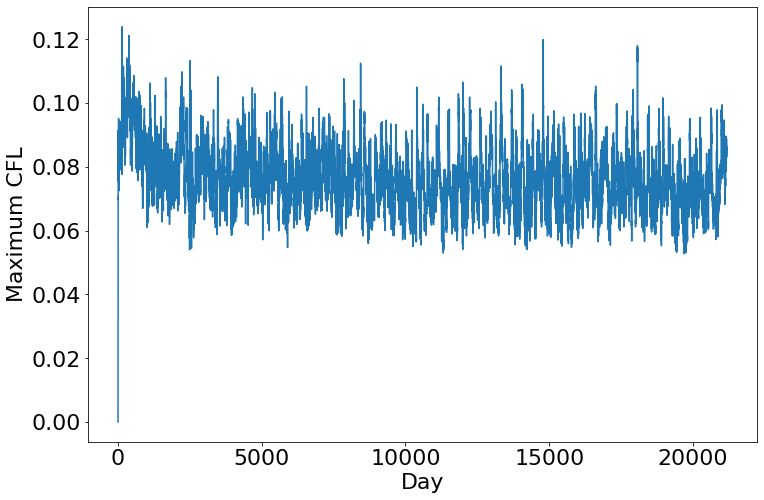

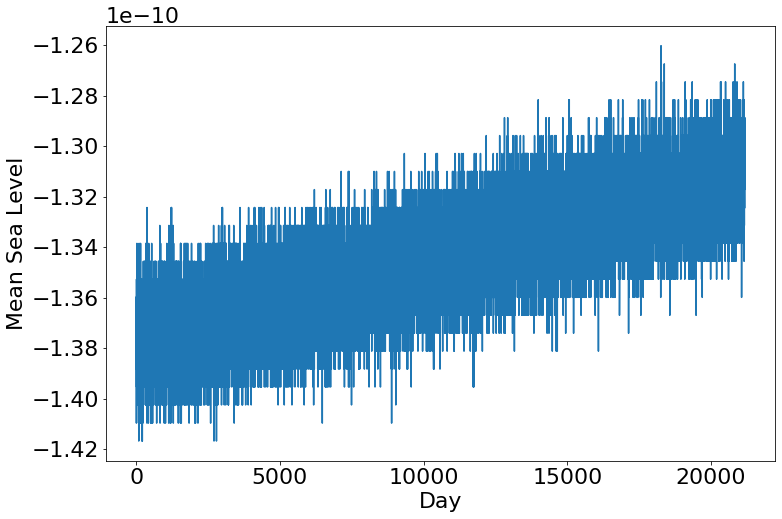

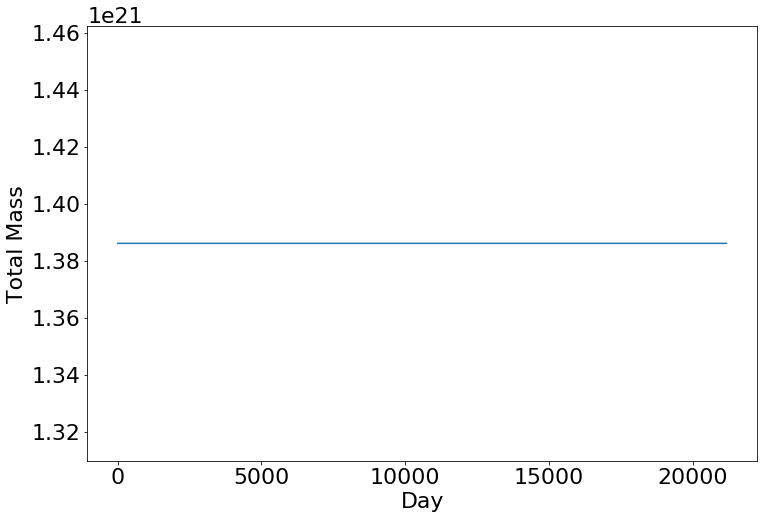

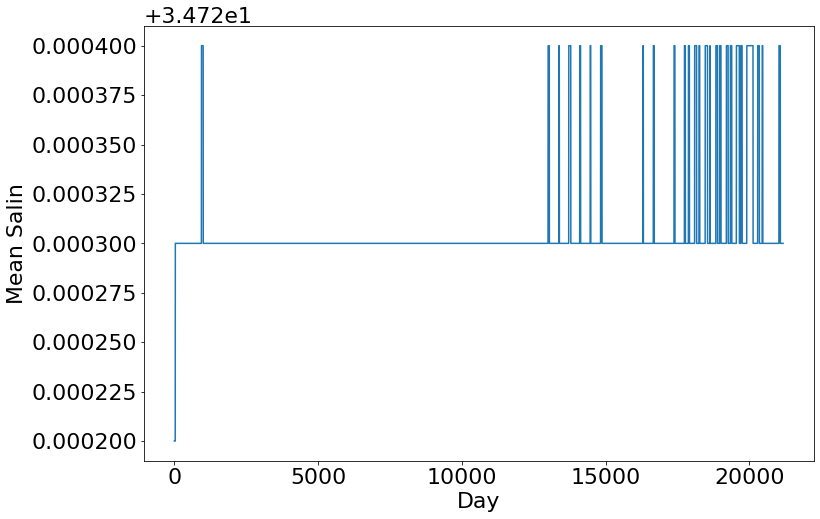

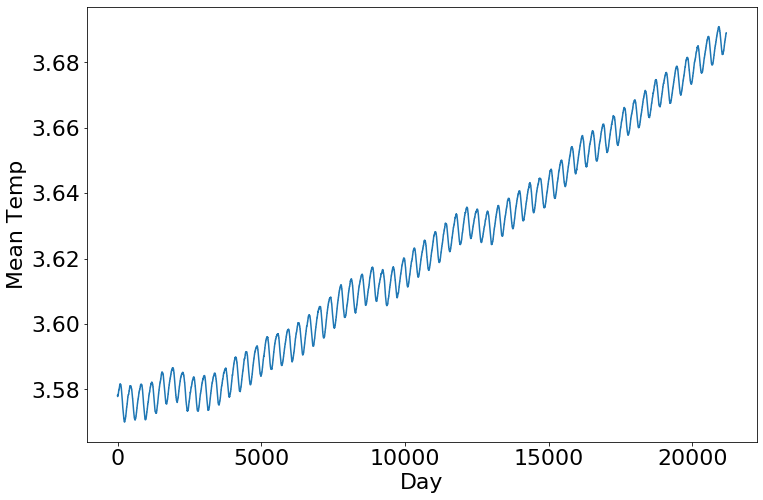

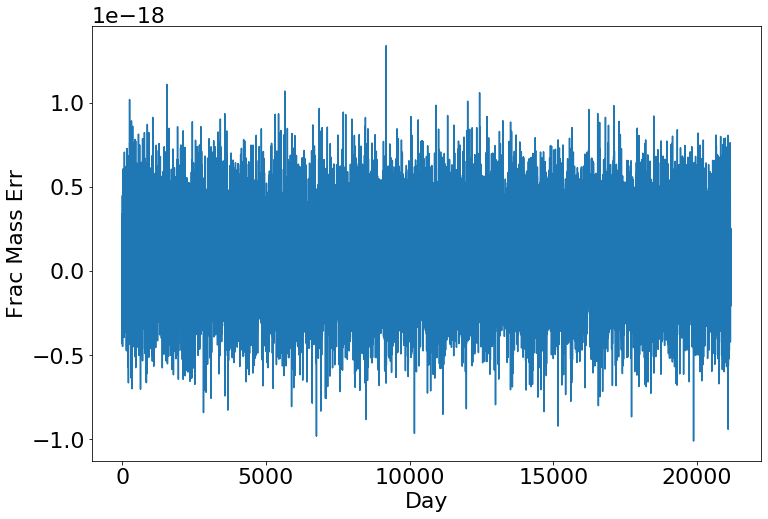

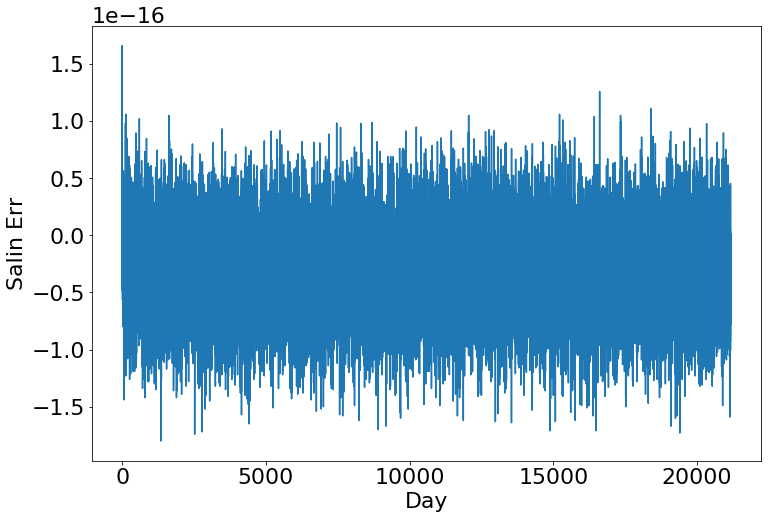

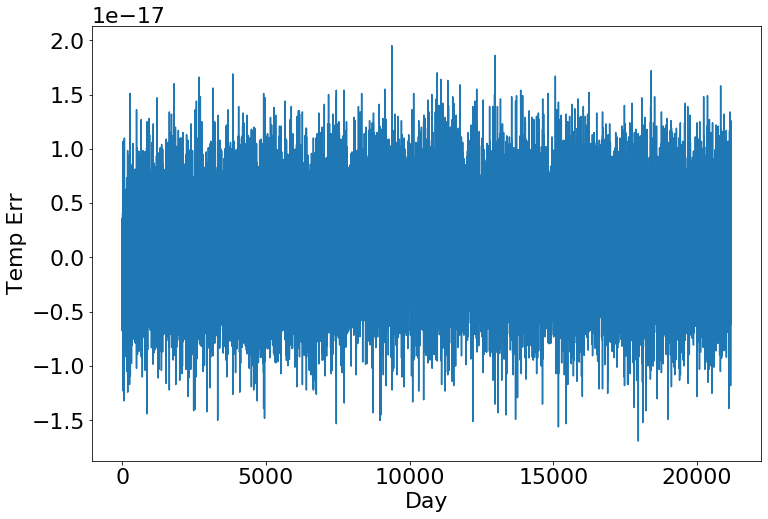

In [10]:
xr = xr.astype(float)
xr.set_coords('Day')
#xr['Day'] = xr['Day']/365.
for var in colnames:
    plt.figure(figsize=(12,8))
    xr[var].plot()

In [11]:
df_stats = xarray.open_dataset(RUNDIR+'/ocean.stats.nc')
df_stats

<xarray.Dataset>
Dimensions:        (Interface: 66, Layer: 65, Time: 21176)
Coordinates:
  * Layer          (Layer) float64 1.25 3.75 6.25 ... 5.627e+03 5.876e+03
  * Interface      (Interface) float64 0.0 2.5 5.0 ... 5.503e+03 5.751e+03 6e+03
  * Time           (Time) timedelta64[ns] 0 days 1 days ... 21170 days
Data variables:
    Ntrunc         (Time) float64 ...
    En             (Time) float64 ...
    APE            (Time, Interface) float64 ...
    KE             (Time, Layer) float64 ...
    H0             (Time, Interface) float64 ...
    Mass_lay       (Time, Layer) float64 ...
    Mass           (Time) float64 ...
    Mass_chg       (Time) float64 ...
    Mass_anom      (Time) float64 ...
    max_CFL_trans  (Time) float64 ...
    max_CFL_lin    (Time) float64 ...
    Salt           (Time) float64 ...
    Salt_chg       (Time) float64 ...
    Salt_anom      (Time) float64 ...
    Heat           (Time) float64 ...
    Heat_chg       (Time) float64 ...
    Heat_anom      (Time) float64 ...
    age            (Time) float64 ...
Attributes:
    filename:  ./ocean.stats.nc

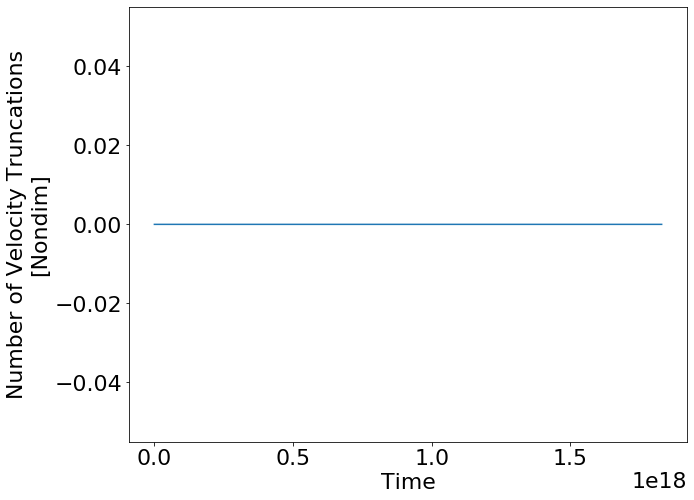

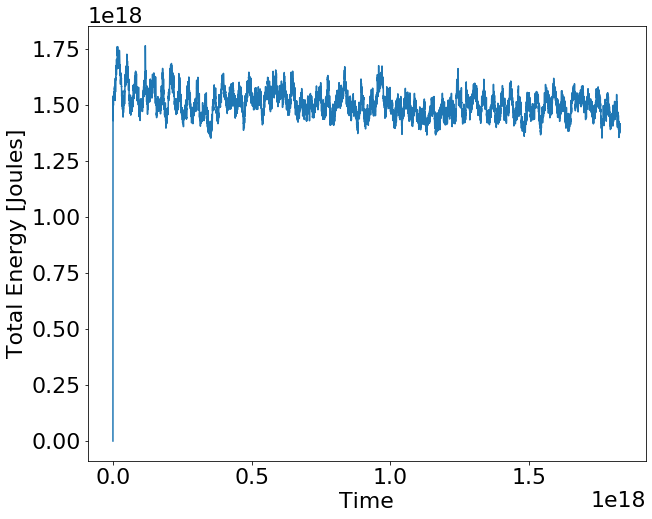

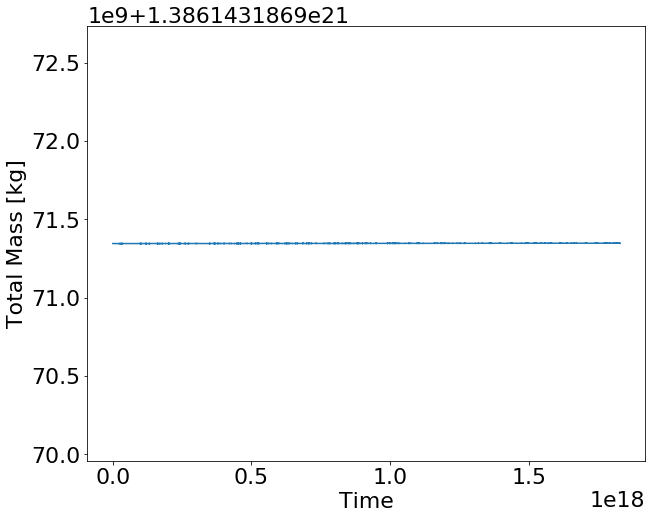

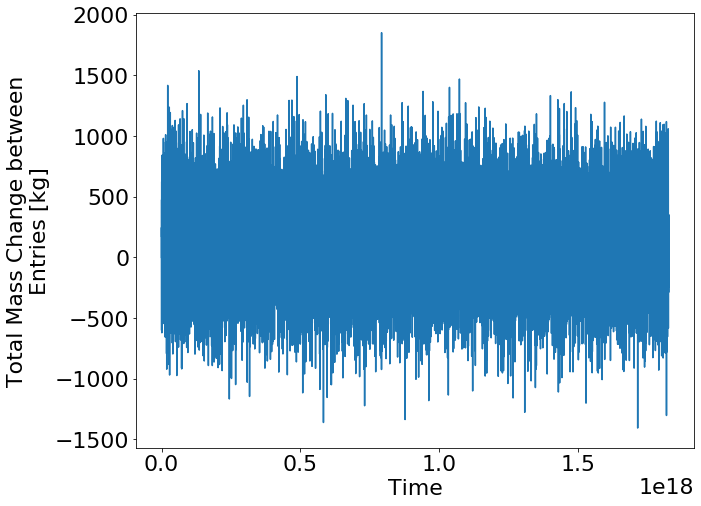

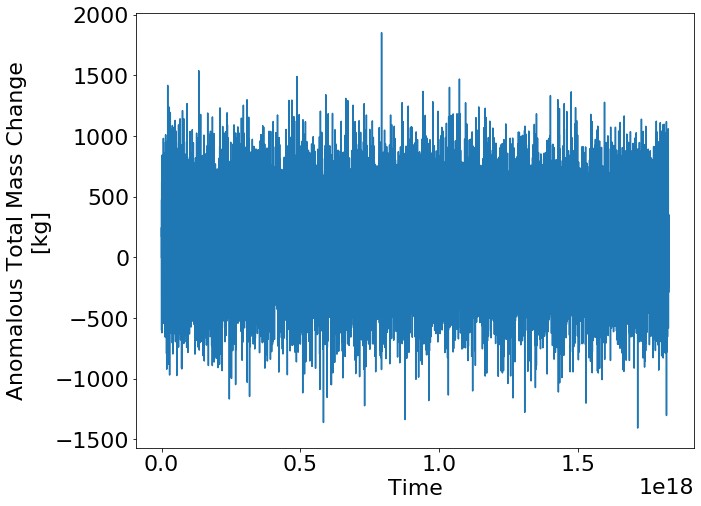

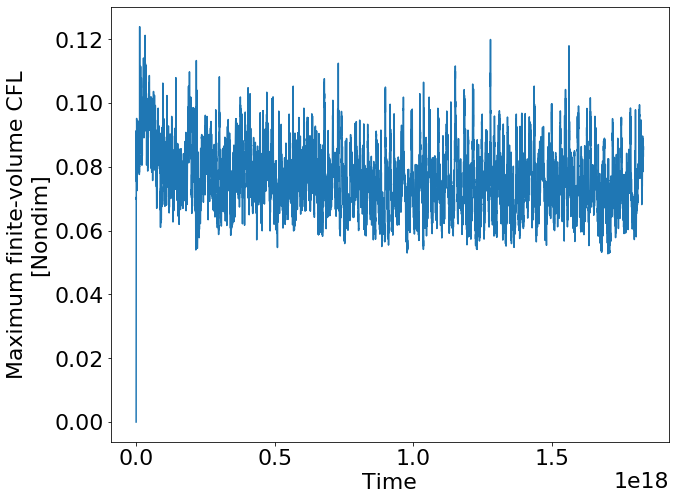

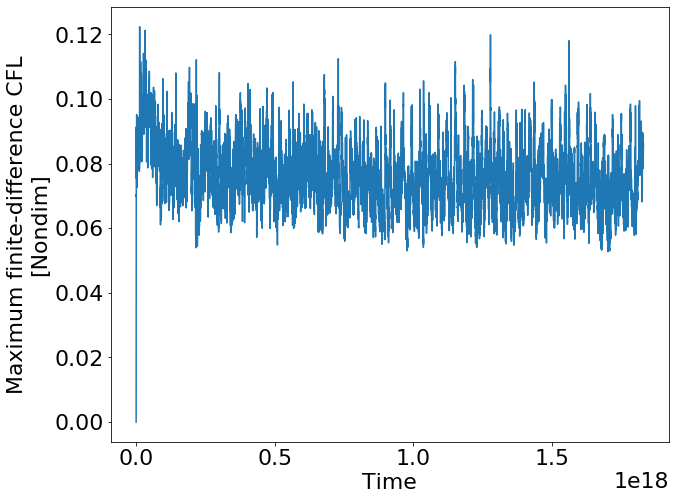

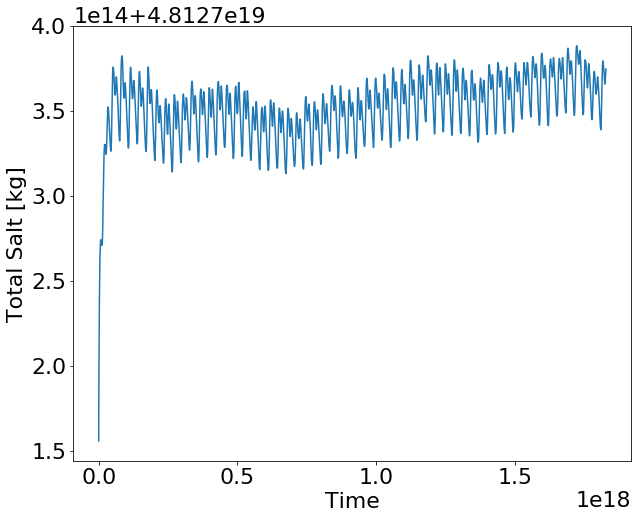

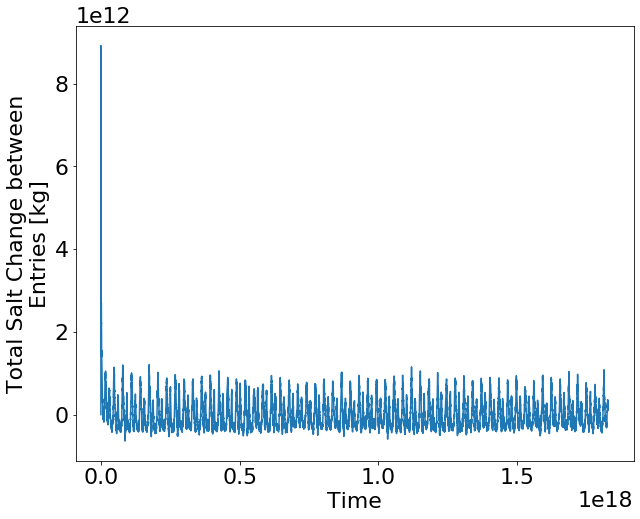

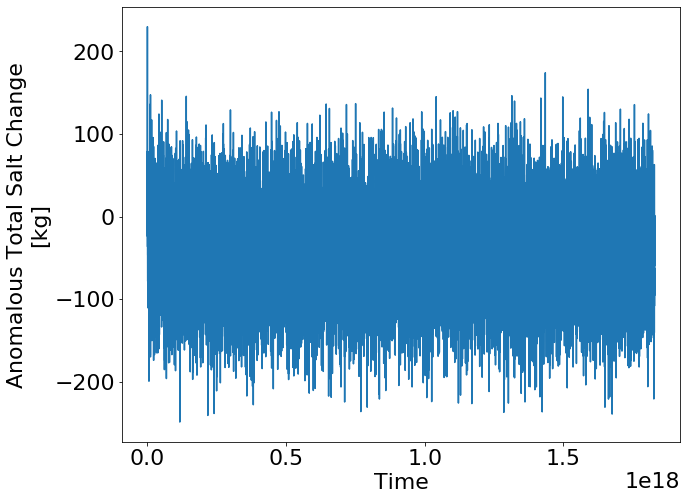

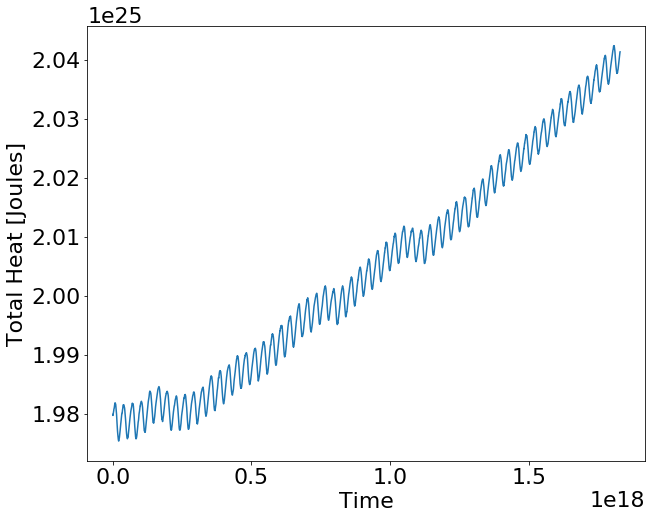

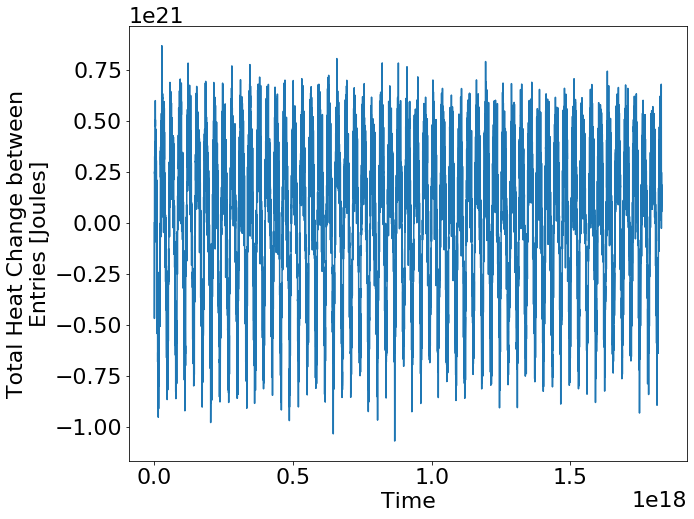

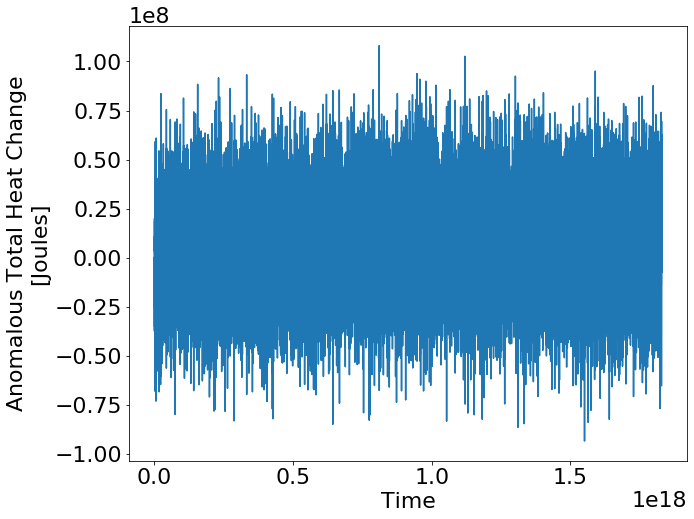

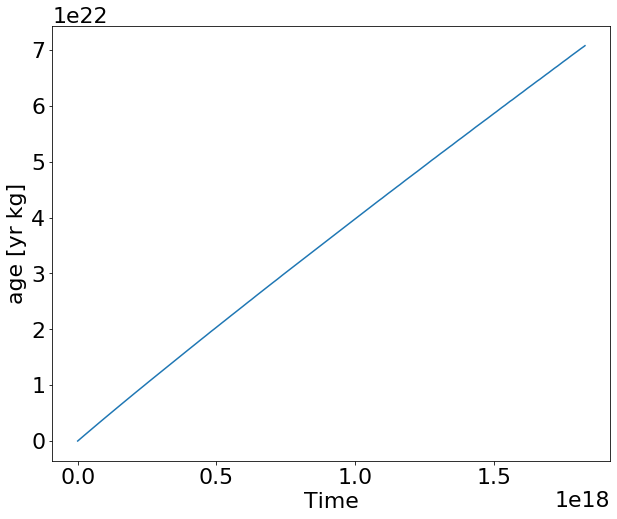

In [12]:
for var in df_stats.variables:
    #print(var)
    if var not in ['KE','APE','H0','Mass_lay','Layer', 'Interface','Time']:
      plt.figure(figsize=(10,8))
      df_stats[var].plot()